In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Data
input_data = np.array([3, 5])

# Model parameters
weights = {
  'node_0': np.array([2, 4]), 
  'node_1': np.array([ 4, -5]), 
  'output': np.array([2, 7])
}

# Coding the forward propagation algorithm

# Calculate node 0 value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output
output = (hidden_layer_outputs * weights['output']).sum()

output

-39

In [3]:
# Using activation functions

# Data
input_data = np.array([-1, 2])

# Model parameters
weights = {
  'node_0': np.array([3, 3]),
  'node_1': np.array([1, 5]),
  'output': np.array([2, -1])
}

# Forward propagation using the "tanh" activation function

# Calculate node 0 value
node_0_input = (input_data * weights['node_0']).sum()  # Compute dot product
node_0_output = np.tanh(node_0_input)  # Use an activation function

# Calculate node 1 value
node_1_input = (input_data * weights['node_1']).sum()  # Compute dot product
node_1_output = np.tanh(node_1_input)  # Use an activation function

# Aggregate hidden layer outputs
hidden_layer_output = np.array([node_0_output, node_1_output])

# Compute prediction
output = (hidden_layer_output * weights['output']).sum()  # Compute dot product
output

0.9901095378334199

In [4]:
# The Rectified Linear Activation Function

# Data
input_data = np.array([3, 5])

# Model parameters
weights = {
  'node_0': np.array([2, 4]),
  'node_1': np.array([ 4, -5]), 
  'output': np.array([2, 7])
}

# Forward propagation using the "RELU" activation function

# RELU: Rectified Linear Unit
def relu(x): return max(x, 0)

# Calulate node 0 value
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into an array
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (without RELU)
model_output = (hidden_layer_outputs * weights['output']).sum()

model_output

52

In [5]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}


def predict_with_network(input_data_row, weights=weights):
  # Calculate node 0 value
  node_0_input = (input_data_row * weights['node_0']).sum()
  node_0_output = relu(node_0_input)
  
  # Calculate node 1 value
  node_1_input = (input_data_row * weights['node_1']).sum()
  node_1_output = relu(node_1_input)
  
  # Put node values into array
  hidden_layer_outputs = np.array([node_0_output, node_1_output])
  
  # Calculate model output
  input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
  model_output = relu(input_to_final_layer)
  
  return model_output

  
results = []
for input_data_row in input_data:
  results.append(predict_with_network(input_data_row, weights))

results

[52, 63, 0, 148]

In [6]:
# Multi-layer neural networks

input_data = np.array([3, 5])

weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}


def predict_with_network(input_data, weights=weights):
  # Calculate node 0 in the first hidden layer
  node_0_0_input = (input_data * weights['node_0_0']).sum()
  node_0_0_output = relu(node_0_0_input)
  
  # Calculate node 1 in the first hidden layer
  node_0_1_input = (input_data * weights['node_0_1']).sum()
  node_0_1_output = relu(node_0_1_input)
  
  # Put node values into array
  hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
  
  # Calculate node 0 in the second hidden layer
  node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
  node_1_0_output = relu(node_1_0_input)
  
  # Calculate node 1 in the second hidden layer
  node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
  node_1_1_output = relu(node_1_1_input)
  
  # Put node values into an array
  hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
  
  # Calculate model output
  model_output = (hidden_1_outputs * weights['output']).sum()
  
  return model_output


output = predict_with_network(input_data)
output

182

In [10]:
# Coding how weight changes affect accuracy

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {
  'node_0': [2, 1],
  'node_1': [1, 2],
  'output': [1, 1]
}

# The actual target value, used to calculate the error
target_actual = 3


def predict_with_network(input_data_row, weights=weights):
  # Calculate node 0 value
  node_0_input = (input_data_row * weights['node_0']).sum()
  node_0_output = relu(node_0_input)
  
  # Calculate node 1 value
  node_1_input = (input_data_row * weights['node_1']).sum()
  node_1_output = relu(node_1_input)
  
  # Put node values into array
  hidden_layer_outputs = np.array([node_0_output, node_1_output])
  
  # Calculate model output
  input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
  model_output = relu(input_to_final_layer)
  
  return model_output


# Make prediction using the original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction
weights_1 = {
  'node_0': [2, 1],
  'node_1': [1, 2],
  'output': [-1, 1]
}

# Make prediction using new weights
model_output_1 = predict_with_network(input_data, weights_1)

#Calculate error
error_1 = model_output_1 - target_actual

# Compare results
error_0, error_1

(6, 0)

In [12]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),
 'node_1': np.array([1. , 1.5]),
 'output': np.array([1. , 1.5])}

from sklearn.metrics import mean_squared_error

model_output_0 = []
model_output_1 = []

for row in input_data:
  model_output_0.append(predict_with_network(row, weights_0))
  model_output_1.append(predict_with_network(row, weights_1))

mse_0 = mean_squared_error(target_actuals, model_output_0)
mse_1 = mean_squared_error(target_actuals, model_output_1)

print(f"Mean squared error with weights_0: {mse_0}")
print(f"Mean squared error with weights_1: {mse_1}")

Mean squared error with weights_0: 37.5
Mean squared error with weights_1: 49.890625


In [3]:
# Code to calculate splopes and update weights
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

gradient = 2 * input_data * error
print(gradient)

weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

5
[30 40]
2.5


In [4]:
# Calculate slopes
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# Calculate the predictions
preds = (input_data * weights).sum()

# Calculate the error
error = preds - target

# Calculate the slope
slope = 2 * input_data * error

print(slope)

[14 28 42]


In [5]:
# Improving model weights
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# Set the learning rate
learning_rate = 0.01

# Calculate the predictions
preds = (weights * input_data).sum()

# Calculate the error
error = preds - target

# Calculate the slope
slope = 2 * input_data * error

# Update the weights
weights_updated = weights - learning_rate * slope

# Get updated predictions
preds_updated = (input_data * weights_updated).sum()

# Calculate updated error
error_updated = preds_updated - target

print(error, error_updated)

7 5.04


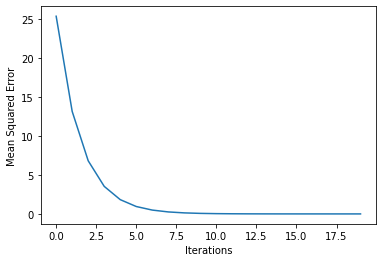

In [10]:
# Making multiple updates to weights
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

def get_mse(input_data, target, weights):
  preds = input_data.dot(weights)
  error = preds - target
  mse = error**2
  return mse

def get_slope(input_data, target, weights):
  preds = input_data.dot(weights)
  slope = 2 * input_data * (preds - target)
  return slope

learning_rate = 0.01
n_updates = 20
mse_hist = []

for i in range(n_updates):
  slope = get_slope(input_data, target, weights)
  weights = weights - learning_rate * slope
  mse = get_mse(input_data, target, weights)
  mse_hist.append(mse)


plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()